#FUSIO HHZ

In [12]:
from obspy import read
from obspy import UTCDateTime, Stream
from scipy import signal
import numpy as np
from numpy.fft import fft
from numpy import ndarray
import matplotlib.pyplot as plt
%matplotlib inline
import obspy.signal
from PIL import Image
from __future__ import division
data = st5[0].data
npts = st5[0].stats.npts
delta = st5[0].stats.delta
from obspy.signal.tf_misfit import plot_tfr
#%pylab inline

In [6]:
st = read("Package_AguilleDru_2377562_SED.mseed")
st5 = st.select(id="CH.FUSIO..HHZ")

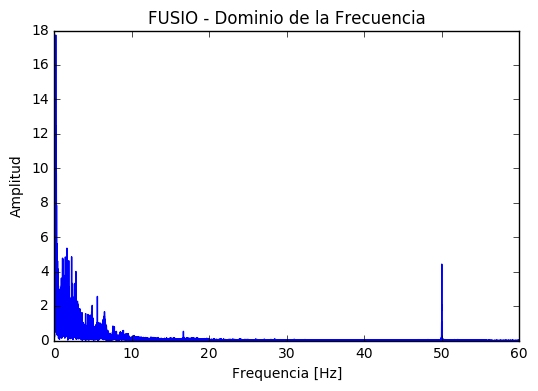

In [7]:
Fsig = np.fft.rfft(st5[0], n=len(st5[0]))
xf = np.linspace(0, 1.0/(2.0*delta), (npts/2)+1)
plt.title('FUSIO - Dominio de la Frecuencia')
plt.plot(xf, 2.0/npts * np.abs(Fsig))
#plt.xlim(0, 5)
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Amplitud') 

In [8]:
st5_filt = st5[0].copy()
st5_filt.filter("bandpass", freqmin=0.0, freqmax=8, corners=2, zerophase=True)

CH.FUSIO..HHZ | 2005-06-30T01:19:58.230000Z - 2005-06-30T01:30:01.763333Z | 120.0 Hz, 72425 samples

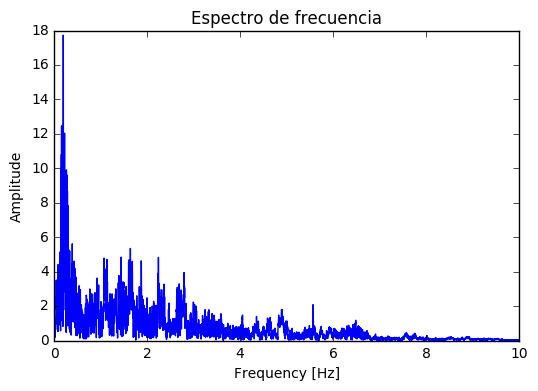

In [9]:
F_filt = np.fft.rfft(st5_filt, n=len(st5_filt))
plt.title('Espectro de frecuencia')
plt.plot(xf, 2.0/npts * np.abs(F_filt)) 
plt.xlim(0, 10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')  

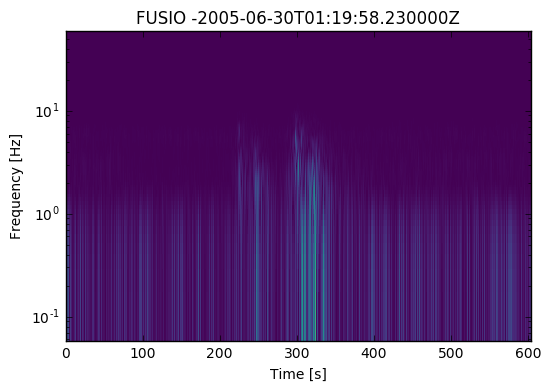

In [10]:
st5_filt.spectrogram(log=True, title='FUSIO -' + str(st5[0].stats.starttime))

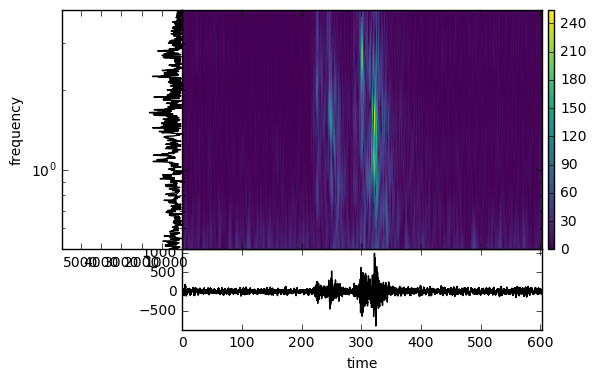

In [14]:
plot_tfr(st5[0].data, dt=delta, fmin=0.5, fmax=4)